In [1]:
%matplotlib inline
from fastai import *

Stochastic gradient Descent (SGD) is an optimization method commonly used in neural networks

The goal of linear regression is to fit a line to set of points

In [2]:
n = 100

In [3]:
x = torch.ones(n,2)

In [11]:
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[ 0.9133,  1.0000],
        [ 0.1810,  1.0000],
        [-0.6128,  1.0000],
        [-0.0005,  1.0000],
        [-0.1719,  1.0000]])

In [12]:
a = tensor(3.,2)

In [13]:
a

tensor([3., 2.])

In [32]:
y = x@a + torch.rand(n)

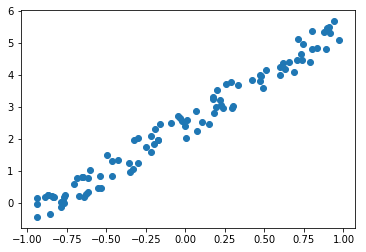

In [33]:
plt.scatter(x[:,0], y);

In [34]:
"""
Find parameters (weights) that minimize the error between the points and the line x@a.
Note a is unknown here
Mean squared error is the most common error function or loss function for regression
"""

'\nFind parameters (weights) that minimize the error between the points and the line x@a.\nNote a is unknown here\nMean squared error is the most common error function or loss function for regression\n'

In [36]:
def mse(y_hat, y):
    return ((y_hat-y)**2).mean()

In [37]:
a = tensor(-1.,1)

In [38]:
y_hat = x@a

In [39]:
mse(y_hat, y)

tensor(7.4777)

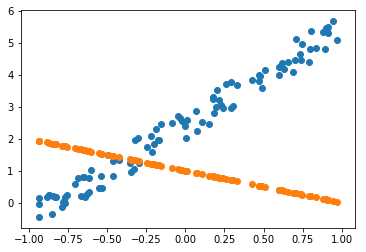

In [41]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat)

In [42]:
a = nn.Parameter(a)
a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [43]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0:
        print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [44]:
lr = 1e-1

In [45]:
lr

0.1

In [46]:
for t in range(100):
    update()

tensor(7.4777, grad_fn=<MeanBackward1>)
tensor(1.4427, grad_fn=<MeanBackward1>)
tensor(0.4024, grad_fn=<MeanBackward1>)
tensor(0.1588, grad_fn=<MeanBackward1>)
tensor(0.1008, grad_fn=<MeanBackward1>)
tensor(0.0869, grad_fn=<MeanBackward1>)
tensor(0.0836, grad_fn=<MeanBackward1>)
tensor(0.0828, grad_fn=<MeanBackward1>)
tensor(0.0827, grad_fn=<MeanBackward1>)
tensor(0.0826, grad_fn=<MeanBackward1>)


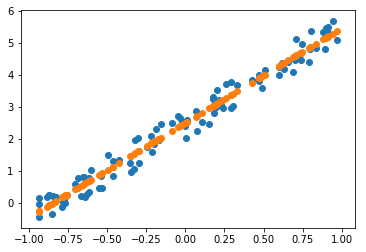

In [48]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],x@a)

In [49]:
from matplotlib import animation, rc
rc('animation', html='html5')

In [50]:
! sudo add-apt-repository -y ppa:mc3man/trusty-media 

gpg: keyring `/tmp/tmpp_zkdo8s/secring.gpg' created
gpg: keyring `/tmp/tmpp_zkdo8s/pubring.gpg' created
gpg: requesting key ED8E640A from hkp server keyserver.ubuntu.com
gpg: /tmp/tmpp_zkdo8s/trustdb.gpg: trustdb created
gpg: key ED8E640A: public key "Launchpad PPA for Doug McMahon" imported
gpg: no ultimately trusted keys found
gpg: Total number processed: 1
gpg:               imported: 1  (RSA: 1)
OK


In [51]:
! sudo apt-get update -y 
! sudo apt-get install -y ffmpeg  
! sudo apt-get install -y frei0r-plugins

Get:1 http://storage.googleapis.com/bazel-apt stable InRelease [2464 B]
Get:2 http://ppa.launchpad.net/git-core/ppa/ubuntu xenial InRelease [17.5 kB]
Get:3 http://security.ubuntu.com/ubuntu xenial-security InRelease [107 kB]
Get:4 http://archive.ubuntu.com/ubuntu xenial InRelease [247 kB]
Get:5 http://storage.googleapis.com/bazel-apt stable/jdk1.8 amd64 Packages [621 B]
Get:6 https://deb.nodesource.com/node_8.x xenial InRelease [4646 B]
Ign:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  InRelease
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  Release [564 B]
Get:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1604/x86_64  Release [564 B]
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64  Release.gpg [801 B]
Get:12 https://deb.nodesource.com/node_8.x xenial/m

In [52]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)